# 180403_feature_extractors
author : angrypark

## 구현해볼 것들
- BasicFeauturesExtractor : sentence length,
- SentimentExtractor
- BadWordsExtractor : negative words, bad words, reverse words + specific words('ㅋ','ㅜ')
- MovieActorExtractor : statistics about actor and movie
- TfidfVectorizer
- SimpleRNNVectorizer
- CountVectorizer

## 추가로 찾아볼 embedding
- 지식인 유사도 예측 - SNLI corpus
- Enhanced lstm
- context에 따라 word embeddin이 바뀌는 모델 - cove, ELMO

In [1]:
import os
import pickle
import sys
import warnings

import tensorflow as tf
import pandas as pd

class DummyFeatureExtractor:
    """
    Base dummy feature extractor
    """
    def extract_feature(self, raw_text, tokenized_text):
        """
        :params raw_text: raw text
        :params tokenized_text: tokenized text, it should be space seperated or list
        """
        return "tuple"

In [3]:
with open("../data/movie.txt") as f:
    data = f.readlines()
    data = [str(t.strip()) for t in data]
    data = pd.DataFrame(data, columns=['comment'])
    
with open("../data/movie_label.txt") as f:
    score = f.readlines()
    data['score'] = pd.DataFrame(score)
    data['score'] = data['score'].map(lambda x: int(x.strip()))

## 기본적 EDA

score 분포

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520343 entries, 0 to 520342
Data columns (total 2 columns):
comment    520343 non-null object
score      520343 non-null int64
dtypes: int64(1), object(1)
memory usage: 7.9+ MB


In [5]:
data['score'].unique()

array([ 8,  9,  7, 10,  4,  5,  6,  2,  1,  3])

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


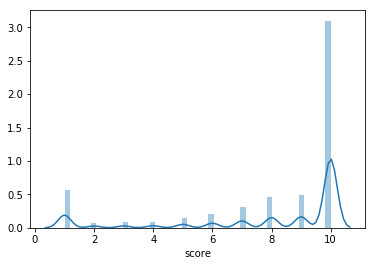

In [6]:
import seaborn as sns
%matplotlib inline
sns.distplot(data['score'])

영화, 배우 숫자

In [7]:
import re

In [8]:
re_movie = re.compile("mv[0-9]*")
re_actor = re.compile("ac[0-9]*")

In [10]:
data['movie'] = data['comment'].map(lambda x: re_movie.findall(x))
data['actor'] = data['comment'].map(lambda x: re_actor.findall(x))

In [21]:
movie_ids = list()
actor_ids = list()
for item in data['movie'].values:
    movie_ids += item
for item in data['actor'].values:
    actor_ids += item

In [23]:
import pickle
pickle.dump(movie_ids, "")